# 06 - Plotting

This notebook gives an introduction to visualizing data in Python.

Python itself does not have any built-in plotting capabilities. Instead, we will be using **matplotlib**, which is the most popular graphics library for Python. 

Specifically, we will be using the `pyplot` submodule, which we must import into our program. Note that it is convention to import this module by giving it the shorter alias `plt`.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Object-oriented interface

The matplotlib library is huge (!!!), and it contains many functions for generating plots in Python.

For example, we can use the `plot` function to create a simple line plot given a sequence of values to place on the $y$- and $x$-axes. However, note that it is important to ensure that the data is sorted according to the values on the $x$-axis (in ascending order).

In [2]:
xvalues = [10, 20, 30, 40]
yvalues = [1, 4, 2, 3]

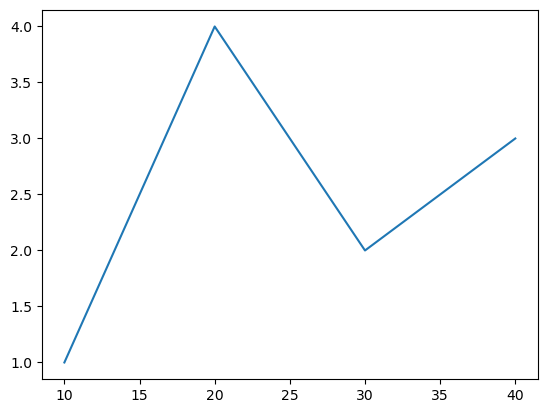

In [3]:
plt.plot(xvalues, yvalues)

Although we can produce simple plots with a one-liner such as above, we will instead use the **object-oriented interface** (OOI) to create plots. This requires a few more lines of code to generate the plot, but it generally gives us more flexibility later on when creating more complex graphs and styling the plots.

In OOI, we use the `subplots` function to create seperate `Figure` and `Axes` objects.

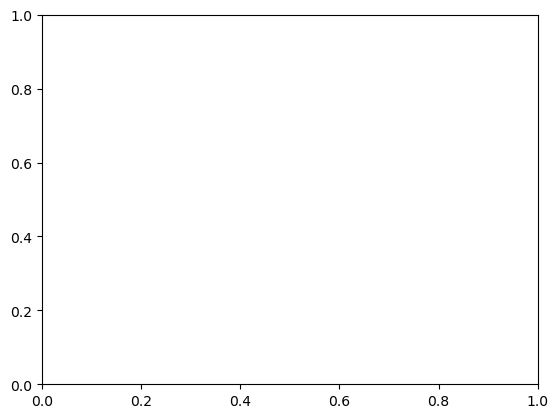

In [4]:
fig, ax = plt.subplots()

We have now created a figure and added axes to the figure. It is on on the axes that we do the actual plotting, whereas the figure is the final "image".

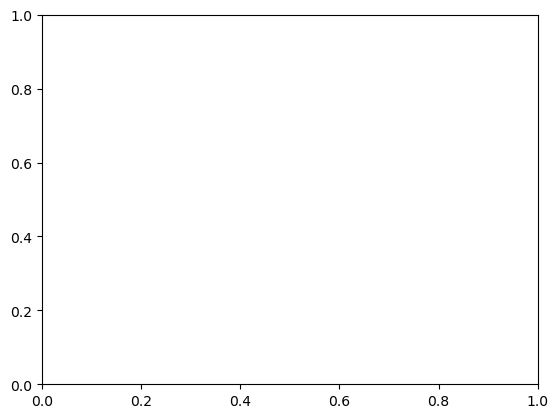

In [5]:
fig

In [6]:
ax

<Axes: >

Once we have created the figure and axes, we can use any plotting function from matplotlib to plot values on the figure's axes.

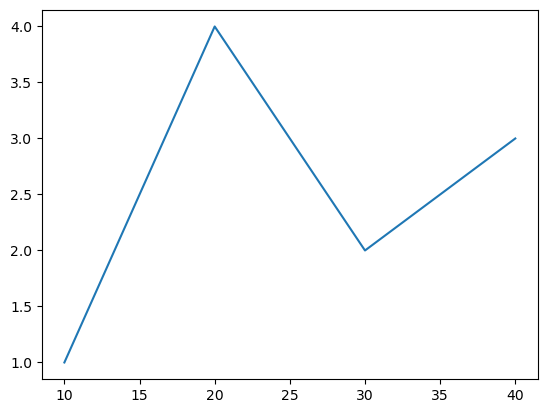

In [7]:
# Step 1: create fig and ax objects
fig, ax = plt.subplots()

# Step 2: plot on the axes
ax.plot(xvalues, yvalues)

# Step 3: display figure
plt.show() 

## Plot types

We will focus on the four types of plots that are most common in data analysis:
- Line plot
- Scatter plot
- Bar plot
- Histogram

#### Line plots

Line plots are one of the most common plots used in data analysis, and they are especially useful to illustrate how a variable is changing over time.

As we have already seen, we can use the `plot` function to generate a line for a given sequence of values on the $y$- and $x$-axes. 

`plot` has many optional parameters that we can specify to change the styling of the line plot, e.g., `color`, `linestyle` and `marker`.

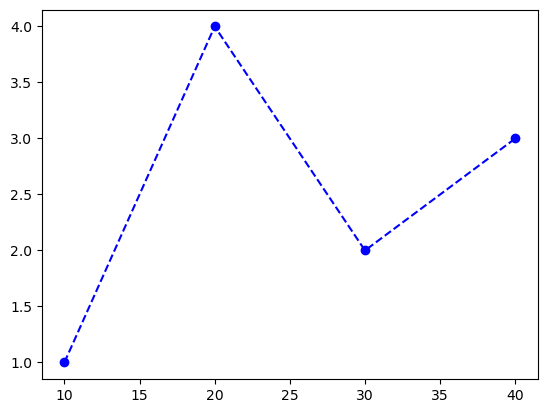

In [8]:
fig, ax = plt.subplots()

ax.plot(xvalues, yvalues, color = 'b', linestyle = '--', marker = 'o')

plt.show() 

To specify the color of a line plot, we use the optional parameter `color` (or `c` for short). We can pass a letter, which is short-hand notation for colors (see [here](https://matplotlib.org/stable/gallery/color/named_colors.html) for more info):
- `b`: blue
- `g`: green
- `r`: red
- `c`: cyan
- `m`: magenta
- `y`: yellow
- `k`: black
- `w`: white

The optional parameter `linestyle` (or `ls` for short) takes a character to specify the style of each line. Some valid values are (see [here](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html) for more info):
- `-`: solid line
- `--`: dashed line
- `-.`: dash-dotted line
- `:`: dotted line

The optional parameter `marker` can be used to add a marker symbol to each observation on the line. Some valid values are (see [here](https://matplotlib.org/stable/api/markers_api.html) for more info):
- `o`: circle
- `s`: square
- `*`: star
- `x`: x
- `d`: (thin) diamond

Note that `plot` has many additional parameters that we can specify to adjust the style of the line plot. See the [function documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) for an overview.

<div class="alert alert-info">
<h3> Your turn</h3>
    <p> Load the data from <TT>FRED_annual.xlsx</TT> in the <TT>data</TT> subfolder. The file contains annual observations on selected macroeconomic variables for the US from 1954 to 2023. Plot the unemployment rate (column <TT>UNRATE</TT>) using a red dotted line. In addition, adjust the line width to make the line plot thicker than the default.
</div>

We can plot multiple sequences in the same graph by making multiple function calls to `plot`. In that case, we apply `plot` on the same `ax` object.

However, note that adding multiple line plots in the same graph generally only makes sense if the two sequences share the values on the $x$-axis.

In [9]:
df = pd.read_excel('data/FRED_annual.xlsx')
print(df.head())

   Year     GDP   CPI  UNRATE  FEDFUNDS  INFLATION
0  1954  2877.7  26.9     5.6       1.0        NaN
1  1955  3083.0  26.8     4.4       1.8  -0.371747
2  1956  3148.8  27.2     4.1       2.7   1.492537
3  1957  3215.1  28.1     4.3       3.1   3.308824
4  1958  3191.2  28.9     6.8       1.6   2.846975


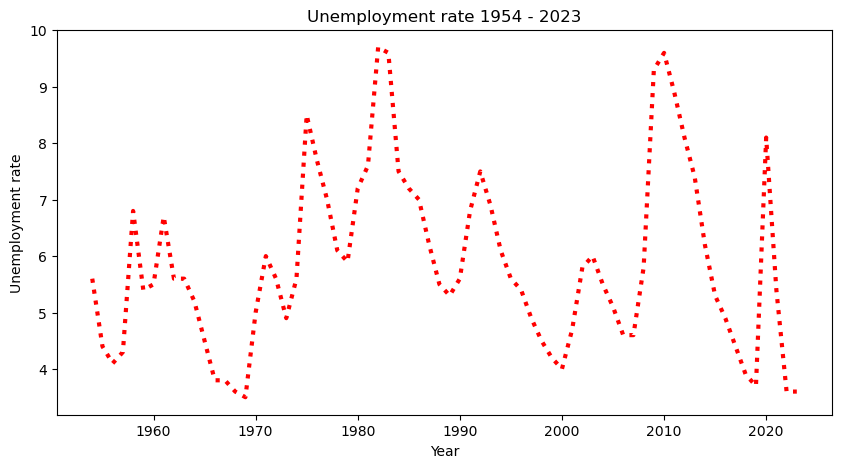

In [10]:
x = df['Year'] #Sets Year as x-values
y = df['UNRATE'] #Sets unrate as y-values

fig, ax = plt.subplots(figsize = (10,5))

ax.plot(x, y, 'r:', linewidth = 3)
ax.set_title('Unemployment rate 1954 - 2023')
ax.set_xlabel('Year')
ax.set_ylabel('Unemployment rate')

plt.show()

In [11]:
xvalues2 = [10, 20, 30, 40]
yvalues2 = [2, 1, 3, 0]

As a default, `plot` will assign different colors to distinguish between the line plots.

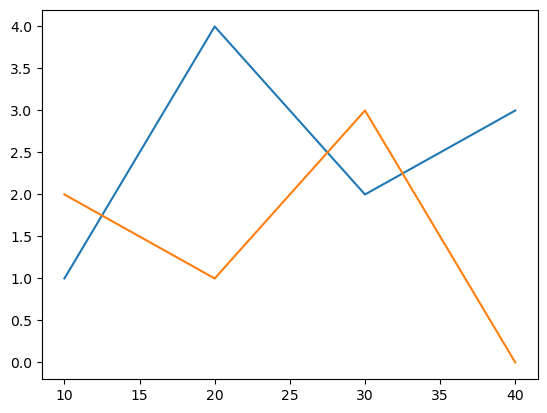

In [12]:
fig, ax = plt.subplots()

# First line plot
ax.plot(xvalues, yvalues)

# Seond line plot
ax.plot(xvalues2, yvalues2)

plt.show() 

We can also use the optional parameters in `plot` to assign different styles to the line plots.

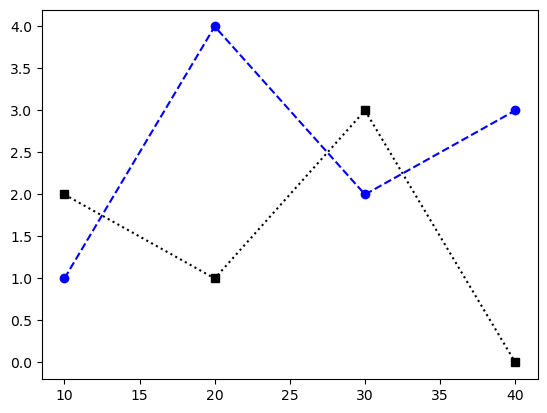

In [13]:
fig, ax = plt.subplots()

# First line plot
ax.plot(xvalues, yvalues, color = 'b', linestyle = '--', marker = 'o')

# Seond line plot
ax.plot(xvalues2, yvalues2, color = 'k', linestyle = ':', marker = 's')

plt.show() 

<div class="alert alert-info">
<h3> Your turn</h3>
    <p> Use the data in <TT>FRED_annual.xlsx</TT> and plot the unemployment rate (column <TT>UNRATE</TT>) using a blue dashed line and the gross domestic product (column <TT>GDP</TT>) using an orange solid line in the same figure. Why does the plot look strange?
</div>

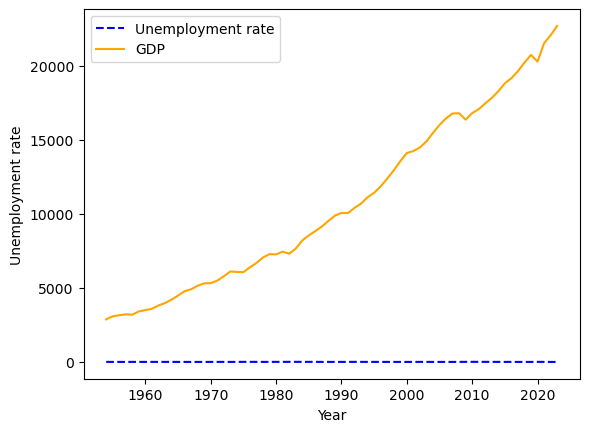

In [14]:
z = df['GDP']

fig, ax = plt.subplots()

ax.plot(x, y, 'b--', label = 'Unemployment rate')
ax.plot(x, z, color = 'orange', label = 'GDP')

ax.set_xlabel('Year')
ax.set_ylabel('Unemployment rate')

ax.legend()

plt.show()

**The reason why the plot looks strange is because we are plotting a percentage with a continous number**

#### Scatter plots

Scatter plots are useful for visualizing the relationship between two sets of data.

Whereas a line plot connects data points with lines, a scatter plot instead displays individual data points as dots, emphasizing the relationship or correlation between two sets of data, e.g., two variables.

<img src="images/scatter_plot_example.png" width = "50%" align="left"/>

Let us use NumPy to generate two sequences of values that are of the same length.

In [15]:
# Create 50 uniformly-spaced values on unit interval
xvalues = np.linspace(0.0, 1.0, 50)

# Draw random numbers 
yvalues = np.random.default_rng(123).random(50)

We then use `scatter` to create a scatter plot by passing the two sequences of values to plot on the $y$- and $x$-axes.

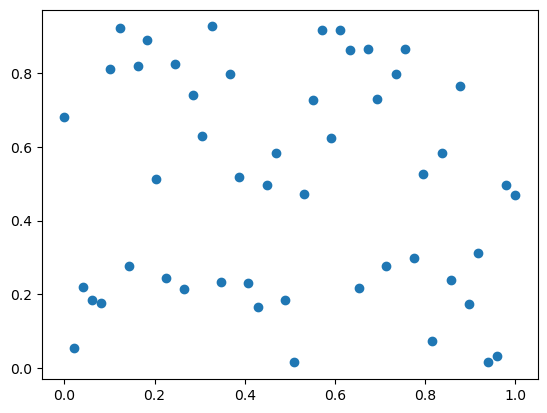

In [16]:
fig, ax = plt.subplots()

ax.scatter(xvalues, yvalues)

plt.show()

As before, we can specify the optional parameters in `scatter` to modify the style of the markers in the plot. Note that `scatter` has an optional parameter `s` that we can pass another sequence of values to assign individual weights to each observation in the plot.

In [17]:
# Draw random marker sizes
size = np.random.default_rng(456).random(len(yvalues)) * 250

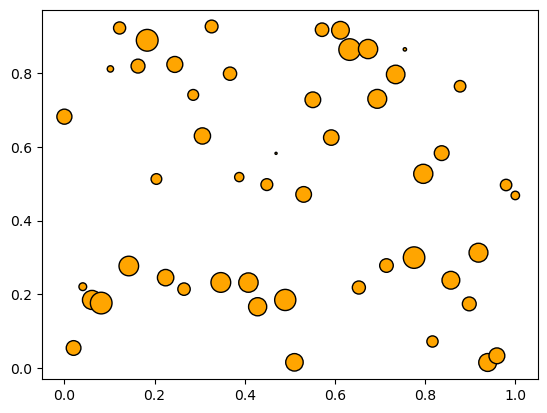

In [18]:
fig, ax = plt.subplots()

ax.scatter(
    xvalues, 
    yvalues, 
    s = size,         # marker size
    color = 'orange', # marker facecolor
    edgecolor = 'k'   # marker edgecolor
)

plt.show()

See the [function documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) for an overview of the optional parameters in `scatter`.

<div class="alert alert-info">
<h3> Your turn</h3>
    <p> Use the data in <TT>FRED_annual.xlsx</TT> and create a scatter plot with the unemployment rate (column <TT>UNRATE</TT>) on the $y$-axis against the gross domestic product (column <TT>GDP</TT>) on the $x$-axis. Specify the optional parameters to plot the data as blue rings with a size smaller than the default marker size. Does the plot indicate a strong relationship between unemployment and GDP?
</div>

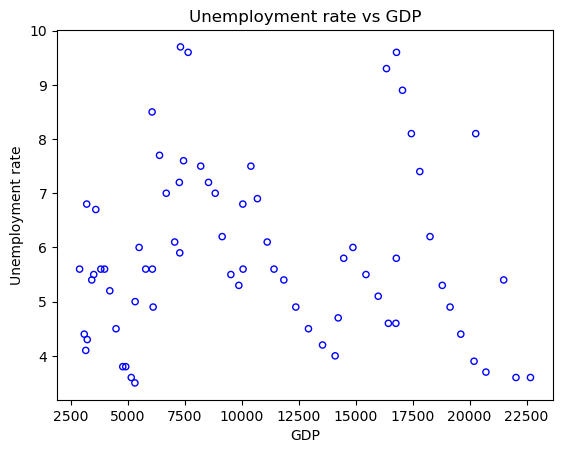

In [19]:
y = df['UNRATE']
x = df['GDP']

fig, ax = plt.subplots()

ax.scatter(
    x,
    y,
    linewidths = 1,
    color = 'b',
    s = 20,
    facecolors = 'none',
)

ax.set_xlabel('GDP')
ax.set_ylabel('Unemployment rate')
plt.title('Unemployment rate vs GDP')

fig.savefig('./Files/UnemploymentRate_vs_GDP', dpi=300)

plt.show()

#### Bar plots

So far, we have only plotted numeric data. Bar plots, on the other hand, are used to represent *categorical* data. These plots can be used for comparing different categories or groups in our data. 

In a bar plot, the values on the $x$-axis are categories, with the *height* of each bar representing the *value* corresponding to the different categories.

<img src="images/bar_plot_example.png" width = "50%" align="left"/>

As before, we need to specify the sequence of values to place on the $y$- and $x$-axis. However, note that the sequence on the $x$-axis can now be non-numerical.

For example, let us illustrate the population in the four largest cities in Norway.

In [20]:
municipality = ['Oslo', 'Bergen', 'Trondheim', 'Stavanger']
population = np.array([717710, 291940,  214565, 149048]) / 1000

To generate the bar plot, we pass the two sequences of values to the `bar` function.

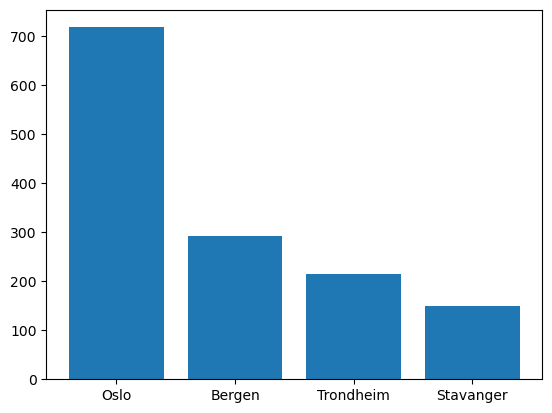

In [21]:
fig, ax = plt.subplots()

ax.bar(municipality, population)

plt.show()

Alternatively, we can use `barh` to create *horizontal* bars.

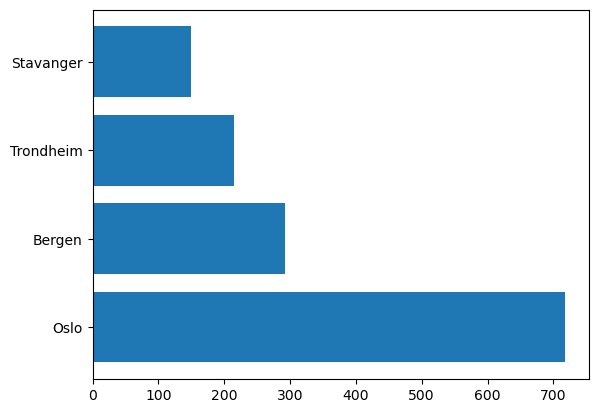

In [22]:
fig, ax = plt.subplots()

ax.barh(municipality, population)

plt.show()

See the [function documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) for an overview of the optional parameters in `bar`.

<div class="alert alert-info">
<h3> Your turn</h3>
    <p> Load the data from <TT>titanic.csv</TT> in the <TT>data</TT> subfolder and illustrate the number of passengers traveling 1st, 2nd and 3rd class in a bar plot. Set the color of the bars to orange and the outline of the bars to black.
</div>

In [23]:
df2 = pd.read_csv('data/titanic.csv')
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000
887,888,1,1,"Graham, Miss Margaret Edith",female,19.0,30.0000
888,889,0,3,"Johnston, Miss Catherine Helen ""Carrie""",female,NaN,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000


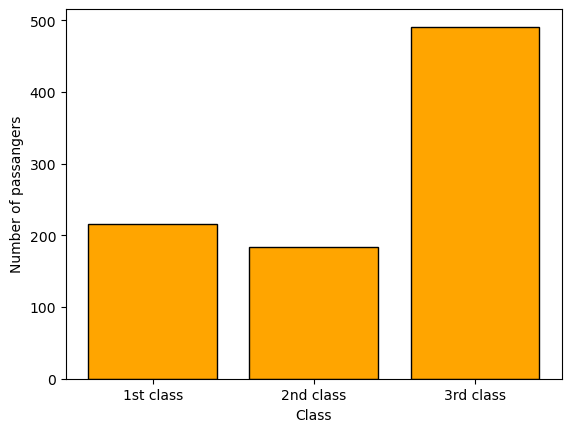

In [24]:
xvalues = ['1st class', '2nd class', '3rd class']
yvalues = df2['Pclass'].value_counts().sort_index()

fig, ax = plt.subplots()

ax.bar(
    xvalues,
    yvalues,
    color = 'orange',
    edgecolor = 'k'
)

ax.set_xlabel('Class')
ax.set_ylabel('Number of passangers')

fig.savefig('files/AmountPerClassTitanic', dpi = 300)

plt.show()

#### Histograms

Histograms are used to visualize the distribution (i.e., frequence) of a numeric variable. These plots show the distribution of the variable by dividing the data into "bins" or groups and displaying the number of observations within each bin as vertical bars of equal width

<img src="images/histogram_example.png" width = "50%" align="left"/>

As opposed to before, we now need only a single sequence of values, i.e., observations on a variable

In [25]:
# Generate random values from a normal distribution
values =  np.random.default_rng(456).standard_normal(200)

To create a histogram of a variable, we pass the observations on the variable to the `hist` function.

As a default, `hist` will split the sequence of values into 10 evenly spaced bins. The values on the $x$-axis correspond to the bins, whereas the values on the $y$-axis correspond to the number of observations in each bin.

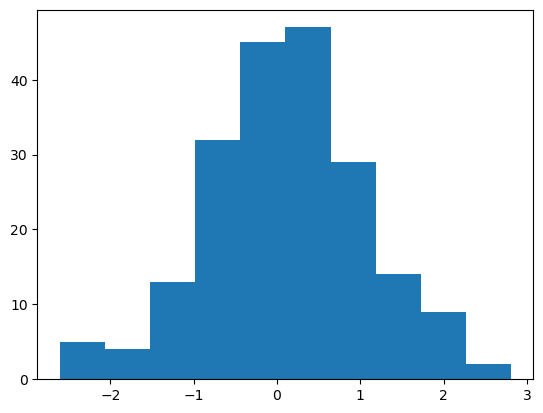

In [26]:
fig, ax = plt.subplots()

ax.hist(values)

plt.show()

As before, we can specify several of the optional parameters in `hist` to modify the styling of the histogram. 

For example, we can use the `bins` parameter to either increase or decrease the number of bins that the sequence of values is split into. We can also set `density=True` to display *shares* instead of total observations on the $y$-axis. 

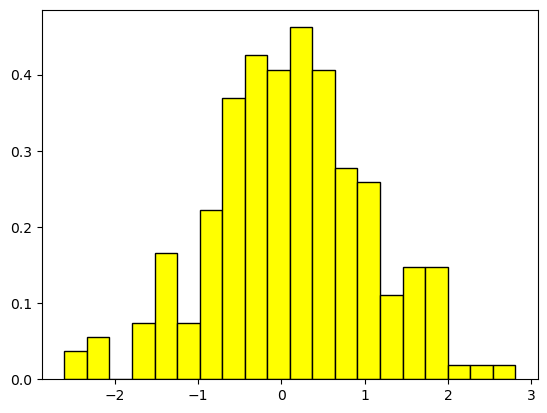

In [27]:
fig, ax = plt.subplots()

ax.hist(
    values,
    bins = 20,           # number of bins
    density = True,      # show shares on y-axis
    color = 'yellow',    # bar facecolor
    edgecolor = 'black', # bar edgecolor
)

plt.show()

See the [function documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) for an overview of the optional parameters in `hist`.

<div class="alert alert-info">
<h3> Your turn</h3>
    <p> Use the data in <TT>titanic.csv</TT> and create a histogram that shows the distribution of the age of the female passengers that survived on the Titanic. Set the number of bins in the histogram to 30.
</div>

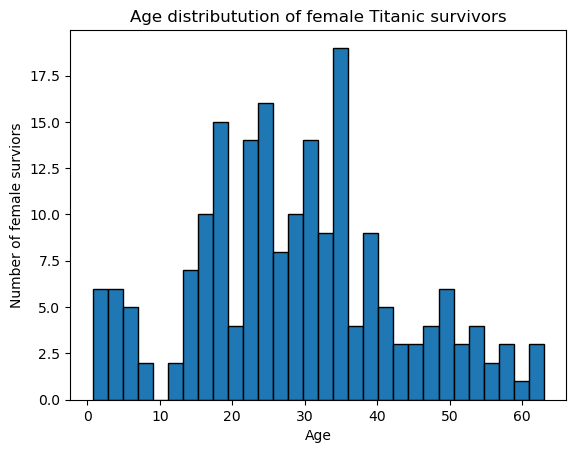

In [28]:
female_survivors = df2[(df2['Survived'] == 1) & (df2['Sex'] == 'female')]

age = female_survivors['Age'].dropna()

fig, ax = plt.subplots()

ax.hist(
    age,
    bins = 30,
    edgecolor = 'black'
)

ax.set_xlabel('Age')
ax.set_ylabel('Number of female surviors')
ax.set_title('Age distributution of female Titanic survivors')

fig.savefig('Files/AgeDistribututiomOfFemaleTitanicSurvivors', dpi = 300)

plt.show()

## Plot customization

There are many additional parameters and functions that we can use to alter the visual appearance of our plots to enhance clarity, highlight specific data points, or improve the overall presentation.

Note that in addition to numbers, we can also place dates on the $x$-axis in a line plot to show how a variable has developed over time. However, for matplotlib to understand that the values are in fact dates, we must convert them to `datetime` objects.

Let us create a line plot of the daily closing price in `apple` with additional styling. 

In [29]:
# Import data
apple = pd.read_csv('data/AAPL.csv')

# Convert date to datetime and sort in ascending order
apple['Date'] = pd.to_datetime(apple['Date'])
apple.sort_values('Date', inplace = True)

apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,74.333511,135480400
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,73.610840,146322800
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,74.197395,118387200
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,73.848442,108872000
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,75.036385,132079200


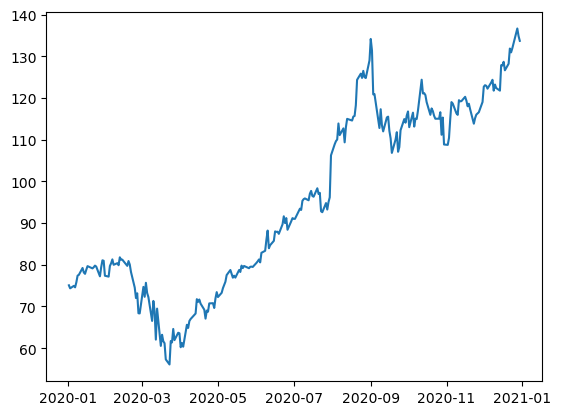

In [30]:
fig, ax = plt.subplots()

ax.plot(apple['Date'], apple['Close'])

plt.show()

To adjust the size of the plot, we can use the `figsize` parameter in `subplots` to specify the width and height of the plot as a tuple.

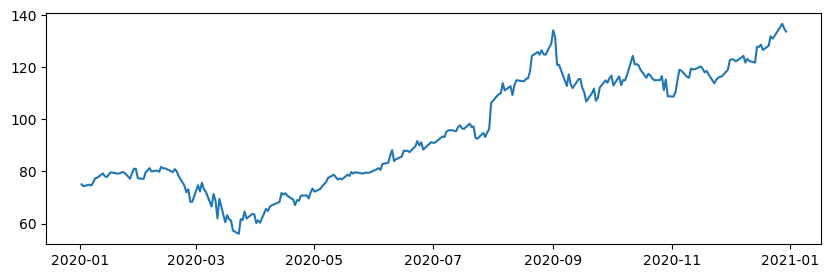

In [31]:
fig, ax = plt.subplots(figsize = (10, 3)) # set figsize

ax.plot(apple['Date'], apple['Close'])

plt.show()

We can use the functions `set_ylabel` and `set_xlabel` to add labels on the figure's axes. Note that these functions are applied on the `ax` object.

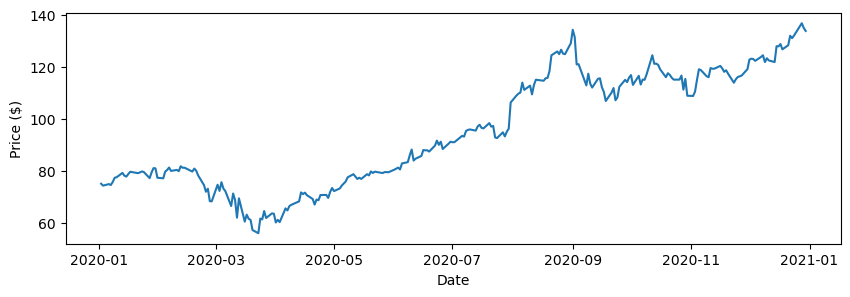

In [32]:
fig, ax = plt.subplots(figsize = (10, 3))

ax.plot(apple['Date'], apple['Close'])

ax.set_ylabel('Price ($)', fontsize = 10) # set ylabel
ax.set_xlabel('Date', fontsize = 10)      # set xlabel

plt.show()

We can use the functions `set_xlim` and `set_ylim` to restrict the ranges of the axis. Again, note that matplotlib is able to handle `datetime` objects.

In [33]:
apple['Date'].min()

Timestamp('2020-01-02 00:00:00')

In [34]:
apple['Date'].max()

Timestamp('2020-12-30 00:00:00')

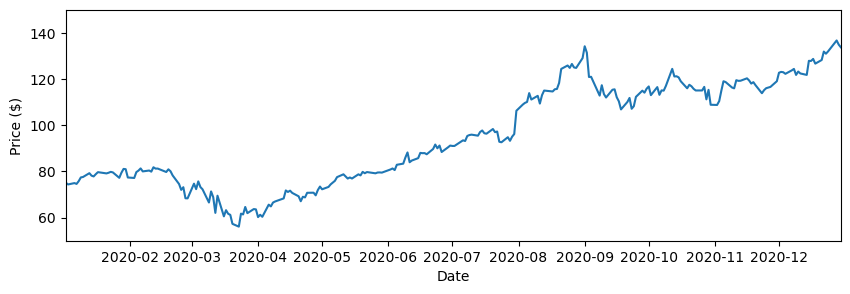

In [35]:
fig, ax = plt.subplots(figsize = (10, 3))

ax.plot(apple['Date'], apple['Close'])

ax.set_ylabel('Price ($)', fontsize = 10) 
ax.set_xlabel('Date', fontsize = 10) 

ax.set_ylim(50, 150)                                  # set ylim
ax.set_xlim(apple['Date'].min(), apple['Date'].max()) # set xlim

plt.show()

We can use `set_title` to add a title to the plot.

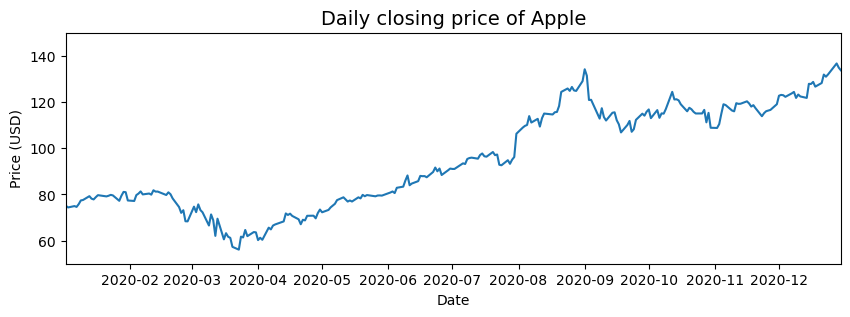

In [36]:
fig, ax = plt.subplots(figsize = (10, 3))

# Add line plot
ax.plot(apple['Date'], apple['Close'])

# Set axis labels and limits
ax.set_ylabel('Price (USD)', fontsize = 10) 
ax.set_xlabel('Date', fontsize = 10) 
ax.set_xlim(apple['Date'].min(), apple['Date'].max()) 
ax.set_ylim(50, 150)

# Set plot title
ax.set_title('Daily closing price of Apple', fontsize = 14)

plt.show()

Often we want to add horizontal or vertical lines to a plot to highlight a particular value on the axes. We can do this by using the functions:
- `axhline` to add a *horizontal* line at a given $y$-value
- `axvline` to add a *vertical* line at a given $x$-value

Let us use `axhline` to add a horizontal line in our graph of the daily closing price for Apple. 

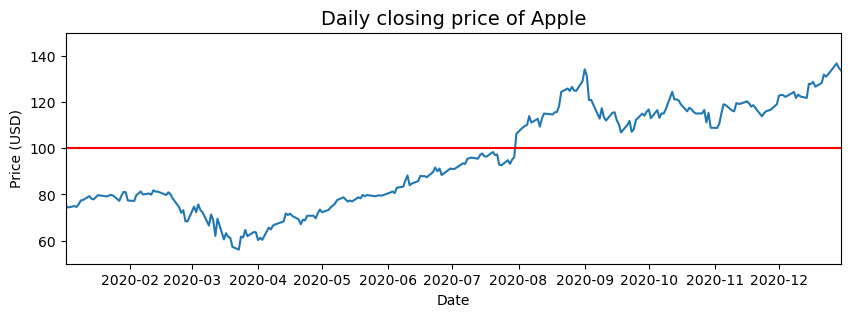

In [37]:
fig, ax = plt.subplots(figsize = (10, 3))

# Add line plot
ax.plot(apple['Date'], apple['Close'])

# Add horizontal line at y = 100
ax.axhline(y = 100, color = 'red')

# Formatting
ax.set_ylabel('Price (USD)', fontsize = 10) 
ax.set_xlabel('Date', fontsize = 10) 
ax.set_xlim(apple['Date'].min(), apple['Date'].max()) 
ax.set_ylim(50, 150)
ax.set_title('Daily closing price of Apple', fontsize = 14)

plt.show()

We can add a vertical line to our plot of the daily closing price of Apple by passing using `axvline` and passing a specific value to the `x` parameter. However, note that since the values on the $x$-axis are timestamps, we have to pass the value as a date using the `Timestamp` function from pandas.

In [38]:
date = pd.Timestamp('2020-03-15')

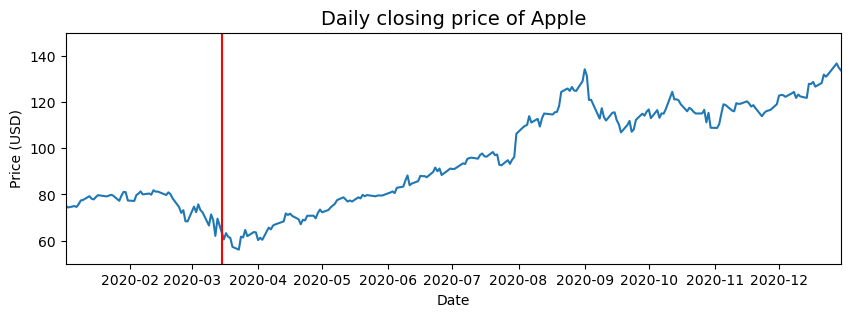

In [39]:
fig, ax = plt.subplots(figsize = (10, 3))

# Add line plot
ax.plot(apple['Date'], apple['Close'])

# Add vertical line at March 15th
ax.axvline(x = date, color = 'red')

# Formatting
ax.set_ylabel('Price (USD)', fontsize = 10) 
ax.set_xlabel('Date', fontsize = 10) 
ax.set_xlim(apple['Date'].min(), apple['Date'].max()) 
ax.set_ylim(50, 150)
ax.set_title('Daily closing price of Apple', fontsize = 14)

plt.show()

Finally, we can specify the `label` parameter in the plotting function to give each line a unique label. We then add these labels to the graph by making a function call to `legend`.

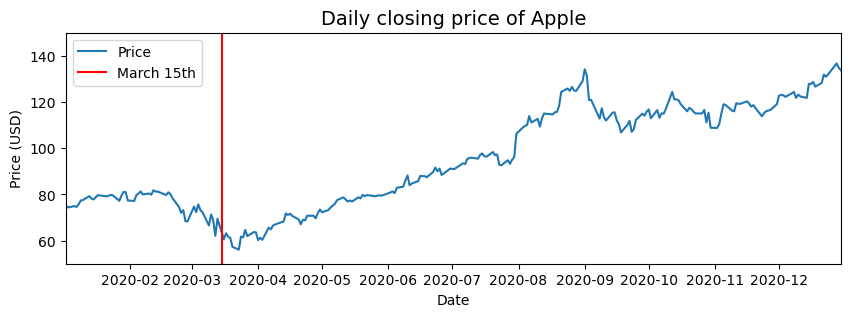

In [40]:
fig, ax = plt.subplots(figsize = (10, 3))

# Add line plot
ax.plot(apple['Date'], apple['Close'], label = 'Price')

# Add vertical line at March 15th
ax.axvline(x = date, color = 'red', label = 'March 15th')

# Formatting
ax.set_ylabel('Price (USD)', fontsize = 10) 
ax.set_xlabel('Date', fontsize = 10) 
ax.set_xlim(apple['Date'].min(), apple['Date'].max()) 
ax.set_ylim(50, 150)
ax.set_title('Daily closing price of Apple', fontsize = 14)

# Add legend
ax.legend()

plt.show()

<div class="alert alert-info">
<h3> Your turn</h3>
    <p> Use the data in <TT>titanic.csv</TT> and create a histogram that shows the distribution of the age of female passengers on the Titanic. Customize the plot with the following:
        
- adjust the figure size
- add labels to the $y$- and $x$-axis
- add a title to the plot
- add vertical lines to indicate the average and median age for female passengers
- add a legend to the plot to denote the vertical lines
        
</div>

In [41]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500


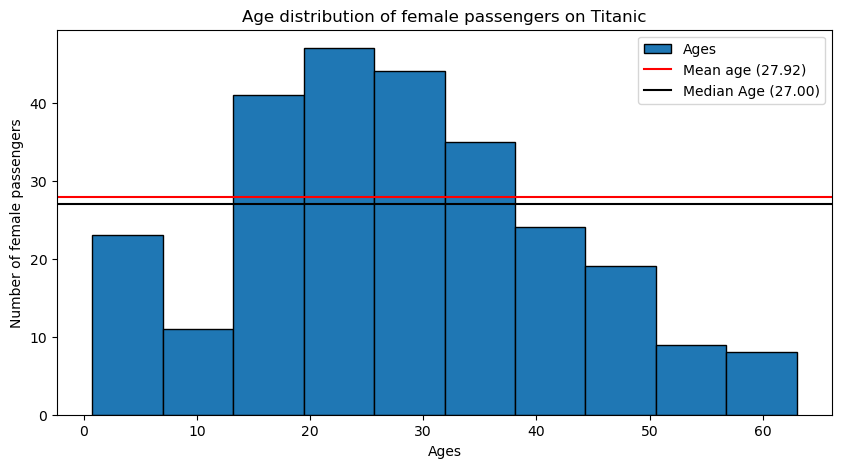

In [42]:
female_passengers = df2[df2['Sex'] == 'female']
ages = female_passengers['Age']

mean_age = ages.mean()
median_age = ages.median()

fig, ax = plt.subplots(figsize = (10, 5))

ax.hist(
    ages,
    label = 'Ages',
    edgecolor = 'k'
)

ax.set_xlabel('Ages')
ax.set_ylabel('Number of female passengers')
ax.set_title('Age distribution of female passengers on Titanic')

ax.axhline(mean_age, color = 'r', label = f'Mean age ({mean_age:.2f})')
ax.axhline(median_age, color = 'k', label = f'Median Age ({median_age:.2f})')
ax.legend()

fig.savefig('Files/AgeDistributionOfFemalePassengersOnTitanic', dpi = 300)

plt.show()

We have so far only displayed plots inside our program. Once we terminate the program, all of our plots are lost. In addition, each time we have created a new figure, we have overwritten the previous one since we have used the same variable name `fig.`

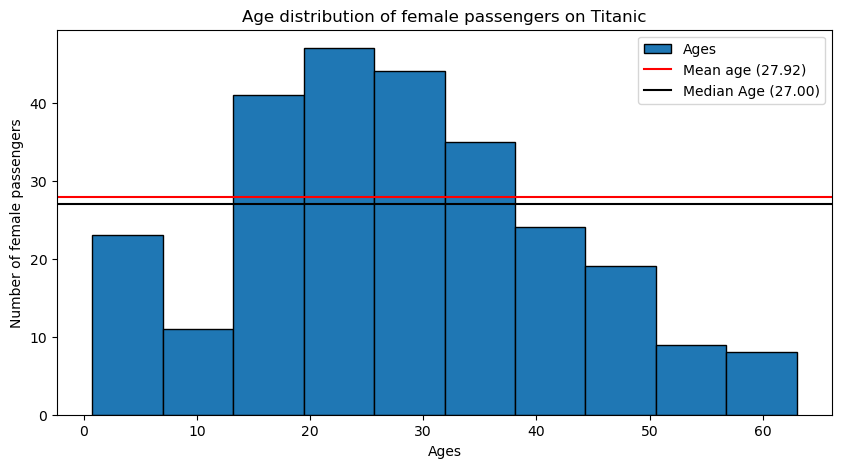

In [43]:
fig

To store our figures, we can use the function `savefig` to store the figure locally on our computers.

As a default, the plot is saved in the same folder as the notebook. However, we can save the figure in a subfolder (or in a different location on our computer) by specifying the path to the folder.

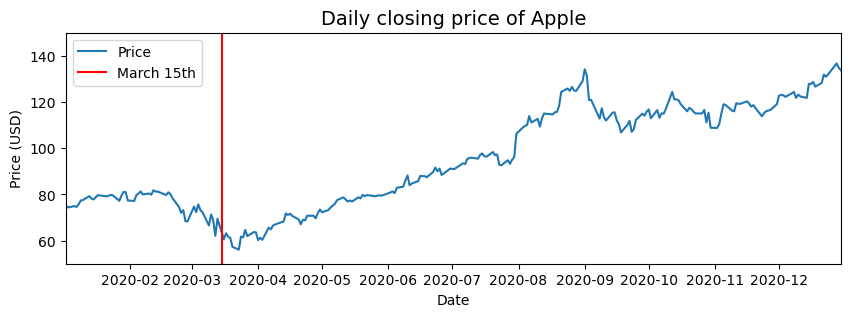

In [44]:
fig, ax = plt.subplots(figsize = (10, 3))

# Add line plot
ax.plot(apple['Date'], apple['Close'], label = 'Price')

# Add vertical line at March 15th
ax.axvline(x = date, color = 'red', label = 'March 15th')

# Formatting
ax.set_ylabel('Price (USD)', fontsize = 10) 
ax.set_xlabel('Date', fontsize = 10) 
ax.set_xlim(apple['Date'].min(), apple['Date'].max()) 
ax.set_ylim(50, 150)
ax.set_title('Daily closing price of Apple', fontsize = 14)

# Add legend
ax.legend()

plt.savefig('plots/apple_close.png', dpi = 500, bbox_inches = 'tight')

#### Style sheets

The default styling in matplotlib is not great as this is an old(er) library developed specifically to compete with and resemble plotting in MATLAB. 

As you have seen, there are many optional parameters that we can specify to improve the styling and formatting of our plots. However, matplotlib also comes with several built-in **style sheets** that we can use to apply predefined styles to our plots to make them look nicer.

Let us see all the styles available:

In [45]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

We can use a style sheet for a specific plot by using the following `with` statement:

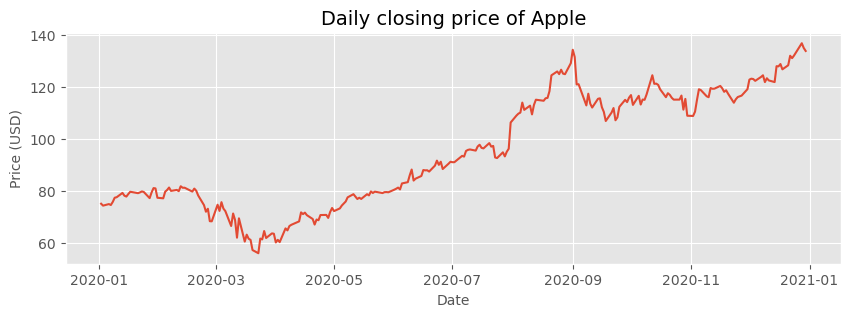

In [46]:
with plt.style.context('ggplot'):

    fig, ax = plt.subplots(figsize = (10, 3))

    # Plot daily closing price of Apple
    ax.plot(apple['Date'], apple['Close'])

    # Add labels, limits and title
    ax.set_ylabel('Price (USD)', fontsize = 10) 
    ax.set_xlabel('Date', fontsize = 10) 
    ax.set_title('Daily closing price of Apple', fontsize = 14)
    
    plt.show()

## Subplots

So far, we have created figures with a single `Axes` object. Although we have added multiple plots in the same figure, they have all been plotted on the same axes.

However, note that a single `Figure` object can hold several `Axes` objects. This is useful when we want to create a single figure with multiple *subplots*.

We can create subplots in the same figure by specifying the number of columns and rows in the `nrows` and `ncols` parameters in `subplots`.

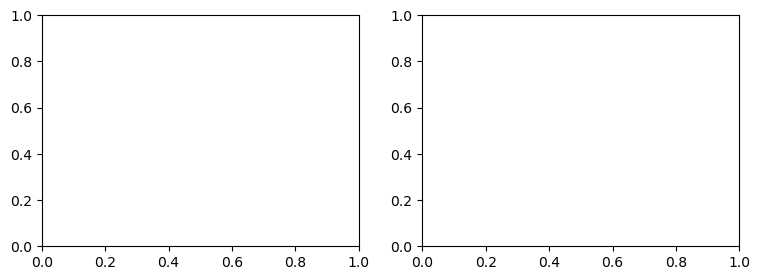

In [47]:
fig, ax = plt.subplots(
    nrows = 1,        # 1 row
    ncols = 2,        # 2 columns
    figsize = (9, 3)
) 

plt.show()

The variable `ax` now contains two `Axes` objects for plotting.

In [48]:
len(ax)

2

In [49]:
ax[0]

<Axes: >

In [50]:
ax[1]

<Axes: >

When plotting, we must now select which `Axes` object to plot on.

Let us use `FRED_annual.xlsx` to plot the annual unemployment rate and GDP in the US from 1954 to 2023.

In [51]:
df_fred = pd.read_excel('data/FRED_annual.xlsx')
df_fred.sort_values('Year', inplace = True)
df_fred.set_index('Year', inplace = True)

df_fred.head()

,GDP,CPI,UNRATE,FEDFUNDS,INFLATION
Year,,,,,
1954,2877.7,26.9,5.6,1.0,NaN
1955,3083.0,26.8,4.4,1.8,-0.371747
1956,3148.8,27.2,4.1,2.7,1.492537
1957,3215.1,28.1,4.3,3.1,3.308824
1958,3191.2,28.9,6.8,1.6,2.846975


However, instead of plotting the two time series in the same plot, we plot them in separate plots side-by-side.

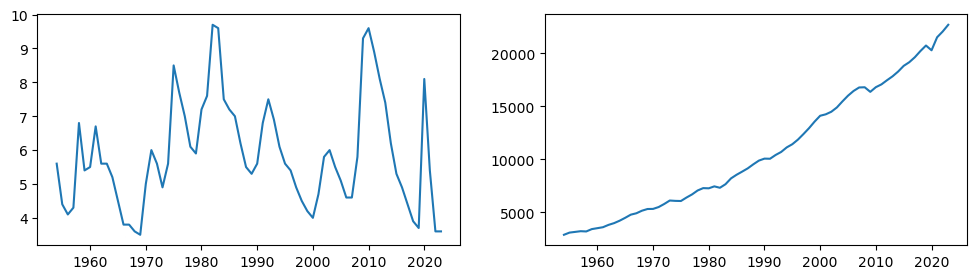

In [52]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 3))

# Plot UNRATE in left subplot
ax[0].plot(df_fred['UNRATE'])

# Plot GDP in right subplot
ax[1].plot(df_fred['GDP'])

plt.show()

Alternatively, we can stack the plots on top of each other.

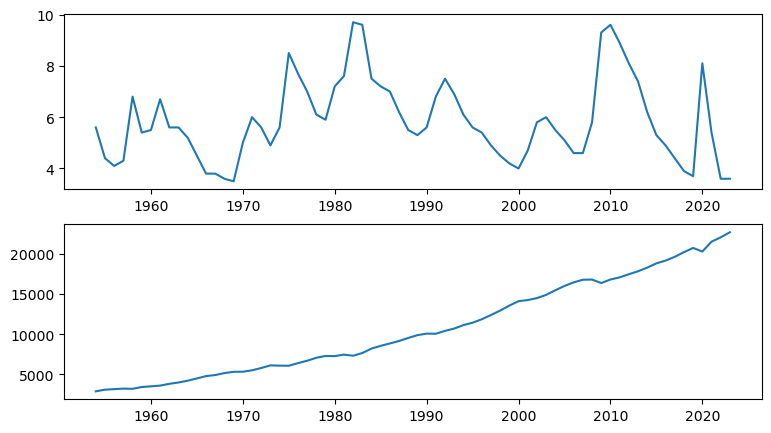

In [53]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (9, 5))

# Plot UNRATE in top subplot
ax[0].plot(df_fred['UNRATE'])

# Plot GDP in bottom subplot
ax[1].plot(df_fred['GDP'])

plt.show()

We can still customize the plots as we previously did. However, we must now specify which of the `Axes` objects that we want to customize.

<div class="alert alert-info">
<h3> Your turn</h3>
    <p> Generate a figure showing the age distribution seperately for female and male passengers on the Titanic. The figure should contain two subplots side-by-side (1x2): 
        
- In the first subplot, show a histogram of the age of female passengers.
- In the second subplot, show a histogram of the age of male passengers.
- Style both subplots by adding e.g., titles and labels.

Store the graph on your computer as <TT>titanic_age.png</TT>.
        
</div>

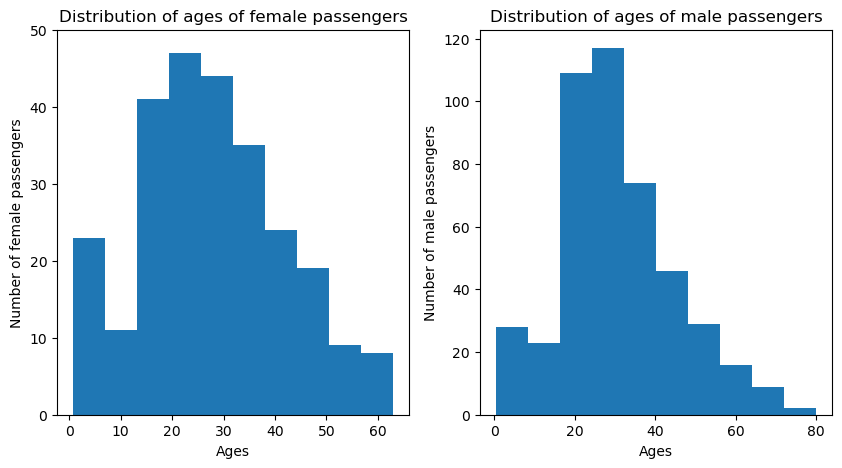

In [54]:
female_passengers = df2[(df2['Sex'] == 'female')]
male_passengers = df2[(df2['Sex'] == 'male')]

ages_female = female_passengers['Age']
ages_male = male_passengers['Age']

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

ax[0].hist(
    ages_female,
    label = 'Ages of female passengers',
)

ax[0].set_title('Distribution of ages of female passengers')
ax[0].set_xlabel('Ages')
ax[0].set_ylabel('Number of female passengers')
ax[0].set_ylim(0, 50)

ax[1].hist(
    ages_male,
    label = 'Ages of female passengers',
)

ax[1].set_title('Distribution of ages of male passengers')
ax[1].set_xlabel('Ages')
ax[1].set_ylabel('Number of male passengers')

fig.savefig('Files/titanic_age.png', dpi = 300)

plt.show()

Note that we can create as many subplots as we want by changing the values given to `nrows` and `ncols`.

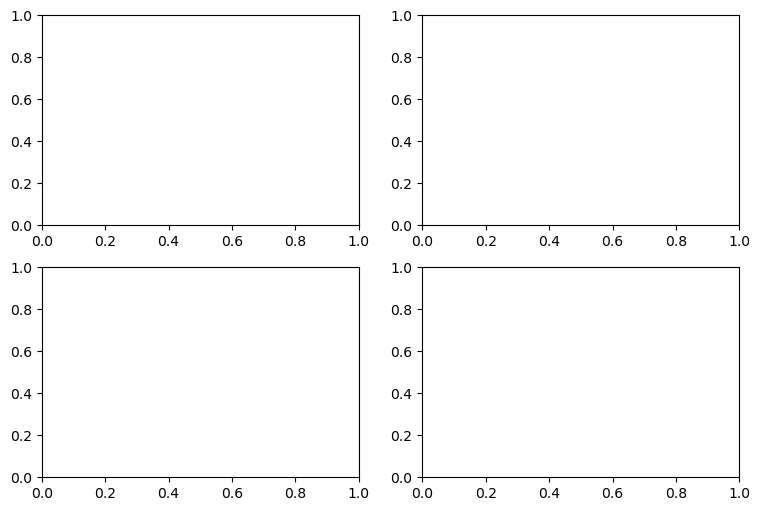

In [55]:
fig, ax = plt.subplots(
    nrows = 2,        # 2 rows
    ncols = 2,        # 2 columns
    figsize = (9, 6)
)

plt.show()

`ax` is now a 2 x 2 matrix containing the `Axes` objects.

In [56]:
ax.shape

(2, 2)

In [57]:
ax[1, 0] # 2nd row, 1st column

<Axes: >

In [58]:
ax[0, 1] # 1st row, 2nd column

<Axes: >

## Plotting with pandas

Pandas offers a wide range of plotting functionalities. Note that pandas does not implement its own graphics library, but instead it provides "wrappers" around matplotlib functions.

Although it is possible to generate all the same plots using matplotlib directly, it can sometimes be convenient to instead use pandas for plotting as it can be used to quickly visualize data stored in DataFrames.

For example, we can use the `plot` function from pandas to add multiple columns in a `DataFrame` in the same line plot. 

In [59]:
apple = pd.read_csv('data/aapl.csv')
apple['Date'] = pd.to_datetime(apple['Date'])
apple.sort_values('Date', inplace = True)

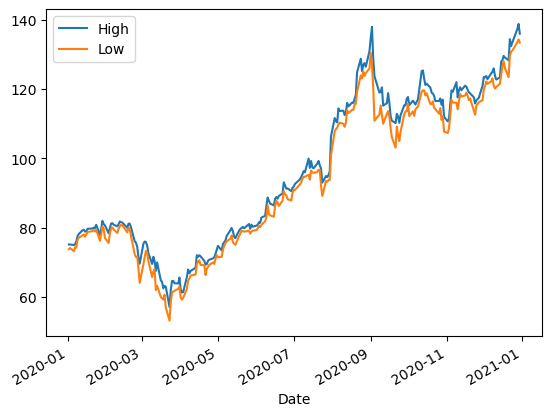

In [60]:
apple.plot(x = 'Date', y = ['High', 'Low'])
plt.show()

Alternatively, we can use the `subplots` parameter to add each line plot in a subplot.

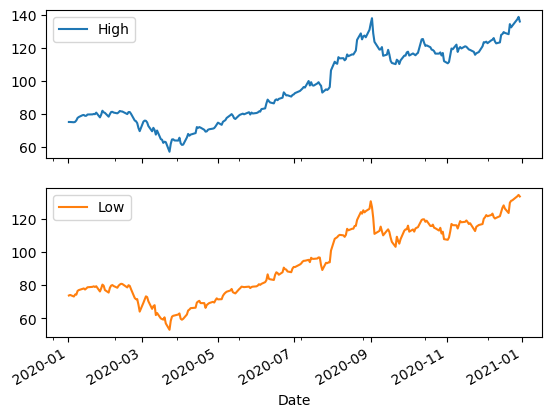

In [61]:
apple.plot(x = 'Date', y = ['High', 'Low'], subplots = True)
plt.show()

We can use the `hist` function to generate histograms of either all numeric columns or a subset of the columns in a `DataFrame`.

In [62]:
titanic = pd.read_csv('data/titanic.csv')

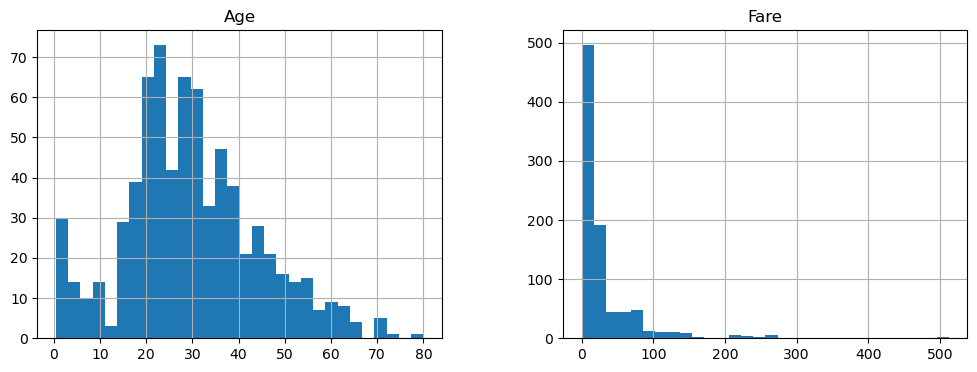

In [63]:
titanic.hist(column = ['Age', 'Fare'], bins = 30, figsize = (12, 4))
plt.show()

We can also use the `by` parameter to show a histogram of a specific column seperately for the unique values in another column.

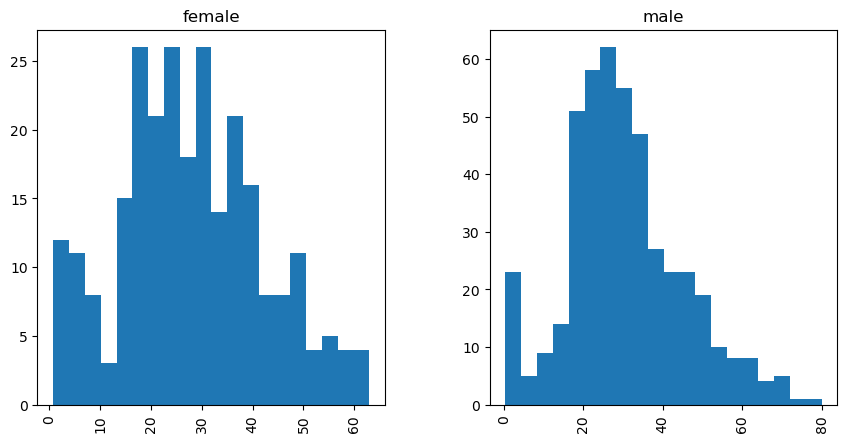

In [64]:
titanic.hist(column = 'Age', by = 'Sex', bins = 20, figsize = (10, 5))
plt.show()

Note that pandas offer a few plotting functions that are especially valuable in data analysis.

For example, pandas has a function called `scatter_matrix`, which let us easily create pairwise scatter plots for several numeric columns in a `DataFrame` along with their distribution.

In [65]:
from pandas.plotting import scatter_matrix

In [66]:
mpg_df = pd.read_excel('data/mpg.xlsx')
mpg_df.head()

,mpg,cylinders,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,140.0,3449,10.5,70,usa,ford torino


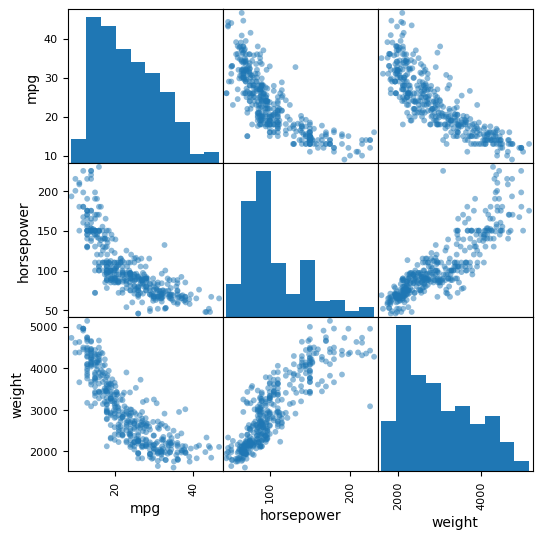

In [67]:
scatter_matrix(
    mpg_df[['mpg', 'horsepower', 'weight']],
    figsize = (6, 6),
    s = 70,          # marker size
    #diagonal = 'kde' # plot kernel density along diagonal (default = 'hist')
)
plt.show()

Or we can use the `boxplot` function to quickly plot some descriptive statistics for a `DataFrame`. This graph shows the median, interquartile range (25th to 75 percentile) and the outliers in the data.

In [68]:
df_fred = pd.read_excel('data/FRED_annual.xlsx')
df_fred.head()

,Year,GDP,CPI,UNRATE,FEDFUNDS,INFLATION
0,1954,2877.7,26.9,5.6,1.0,NaN
1,1955,3083.0,26.8,4.4,1.8,-0.371747
2,1956,3148.8,27.2,4.1,2.7,1.492537
3,1957,3215.1,28.1,4.3,3.1,3.308824
4,1958,3191.2,28.9,6.8,1.6,2.846975


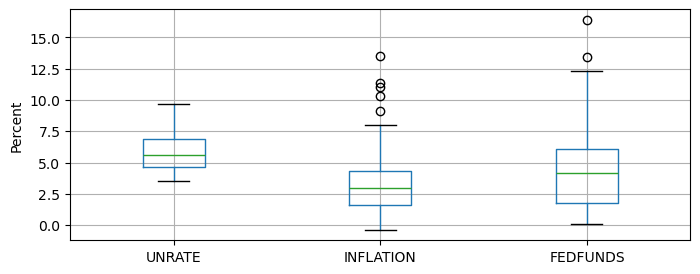

In [69]:
df_fred.boxplot(
    column = ['UNRATE', 'INFLATION', 'FEDFUNDS'],
    ylabel = 'Percent',
    figsize = (8, 3)
)

plt.show()

## Additional resources

- For details on a particular plotting function, see the [official documentation](https://matplotlib.org/stable/users/index.html) for matplotlib.
- There is also an official introductory [tutorial](https://matplotlib.org/stable/tutorials/pyplot.html) for matplotlib.
- For more details on how to plot with pandas, you can consult their [user guide](https://pandas.pydata.org/docs/user_guide/visualization.html).

Note that there is an additional high-level plotting library called [seaborn](https://seaborn.pydata.org/) which builds on top of matplotlib with a focus on providing convenient functions to create statistical graphs.

# Home exercises

We have already seen how we can define our own functions in Python using the `def` keyword. One common use of *non-value returning* functions in Python is to define functions that plot data. Such functions can be very useful when we want to create multiple plots from the same or similar data without having to duplicate code.

For example, let us create a function that shows a line plot for a given sequence of values on the $y$- and $x$ axis. The function has two parameters: `xvals` and `yvals`. Note that the function use an `if` statement to check that the value sequences are of the same length.

In [70]:
def plot_line(yvals, xvals = [10, 20, 30, 40]):

    if len(yvals) == len(xvals):
        fig, ax = plt.subplots()
        ax.plot(xvals, yvals)
        plt.show()

    else:
        print('Sequences are not of the same length!')

We can now use `plot_line` to generate a line plot for any sequence of values as long as the sequences are of the same length.

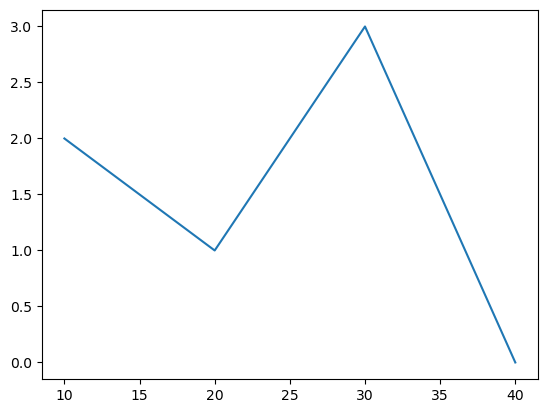

In [71]:
plot_line([2, 1, 3, 0])

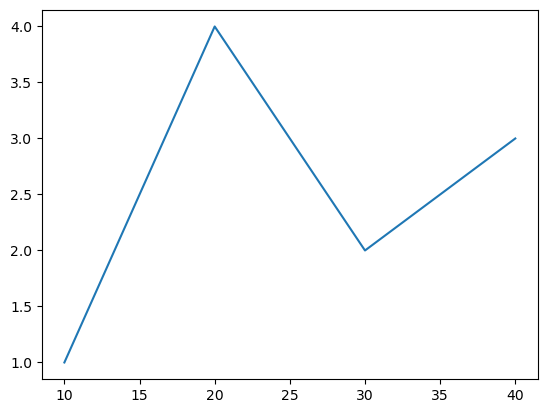

In [72]:
plot_line([1, 4, 2, 3])

In [73]:
plot_line([1, 4, 2, 3, 5])

Sequences are not of the same length!


### 📚 Exercise 1: Fuel economy

Use the data in <code>mpg.xlsx</code> and explore the data visually.

Create a single figure with 4 subplots side-by-side (1x4 plot):

- In the first subplot, show a histogram of <code>mpg</code> with x bins.
- In the second subplot, show a bar plot with the number of cars for the different values in <code>origin</code>
- In the third subplot, show a scatter plot between <code>mpg</code> and <code>weight</code>
- In the fourth subplot, show a scatter plot between <code>mpg</code> and <code>acceleration</code>

Style the subplots to make them look nice and save the figure as `mpg_plot.png`.

In [74]:
mpg_df = pd.read_excel('data/mpg.xlsx')
mpg_df.head()

,mpg,cylinders,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,140.0,3449,10.5,70,usa,ford torino


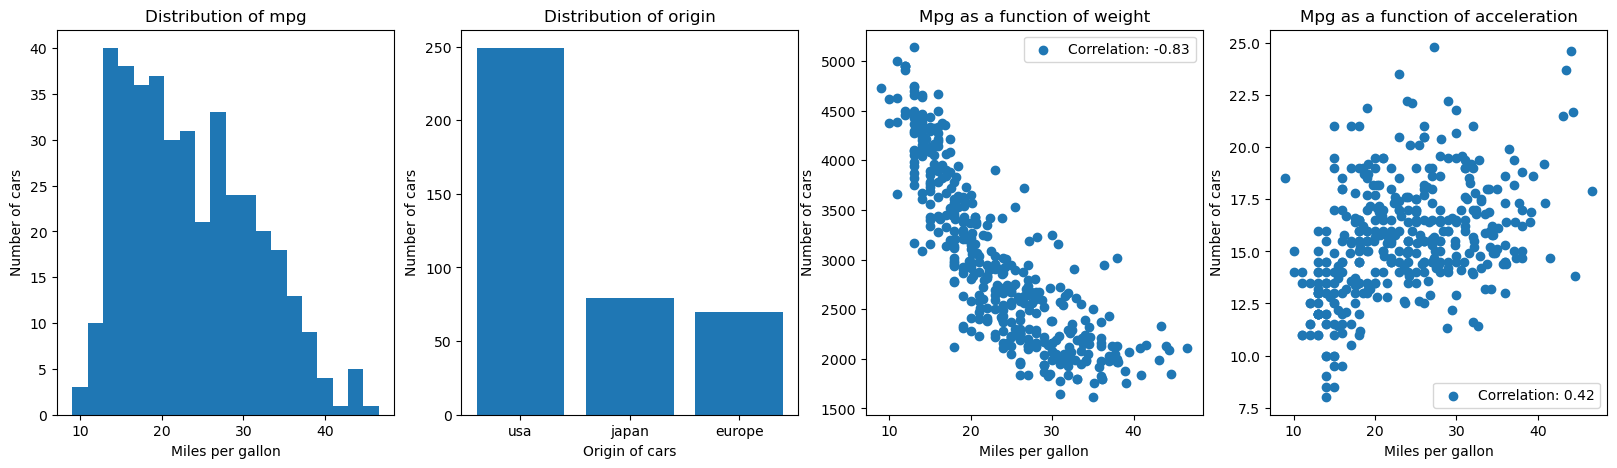

In [75]:
mpg = mpg_df['mpg']

origin = mpg_df['origin']
origin_count = origin.value_counts()

weight = mpg_df['weight']

acceleration = mpg_df['acceleration']

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 5))

#Subplot mpg
ax[0].hist(
    mpg,
    bins = 20
)

ax[0].set_xlabel('Miles per gallon')
ax[0].set_ylabel('Number of cars')
ax[0].set_title('Distribution of mpg')

#Subplot origin
ax[1].bar(
    origin_count.index,
    origin_count
)
ax[1].set_xlabel('Origin of cars')
ax[1].set_ylabel('Number of cars')
ax[1].set_title('Distribution of origin')

#Subplot mpg and weight
ax[2].scatter(
    mpg,
    weight,
    label = f'Correlation: {mpg_df['mpg'].corr(mpg_df['weight']):.2f}',
)
ax[2].set_xlabel('Miles per gallon')
ax[2].set_ylabel('Number of cars')
ax[2].set_title('Mpg as a function of weight')
ax[2].legend()

#Subplot mpg and acceleration
ax[3].scatter(
    mpg, 
    acceleration,
    label = f'Correlation: {mpg_df['mpg'].corr(mpg_df['acceleration']):.2f}'
)

ax[3].set_xlabel('Miles per gallon')
ax[3].set_ylabel('Number of cars')
ax[3].set_title('Mpg as a function of acceleration')
ax[3].legend()

fig.savefig('Files/mpg_plot.png', dpi = 300, bbox_inches = 'tight')

plt.show()

### 📚 Exercise 2: Apple closing price

Use `apple.csv` to visualize the daily closing price of Apple during 2020, and the average price before and after July 1st.

Import the data and:
- Plot a line chart showing the daily closing price across the year.
- Compute the average closing price:
    - before July 1, 2020
    - on and after July 1, 2020
- Add horizontal dashed lines to show these averages (use different colors for before/after).
- Add a vertical line at July 1, 2020 to indicate the cutoff date.
- Make the plot look nice with a title, axis labels, and a legend.
- Save the figure as `apple_plot.png`

*Hint*: Use `hlines` (instead of `axhline`) to add a horizontal line for a section of the values on the $x$-axis. Note also that you can use the pandas function `Timestamp` (instead of `to_datetime`) to convert a specific date (e.g., '2020-07-01') to a timestamp.

In [76]:
apple = pd.read_csv('data/AAPL.csv')
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,74.333511,135480400
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,73.610840,146322800
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,74.197395,118387200
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,73.848442,108872000
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,75.036385,132079200


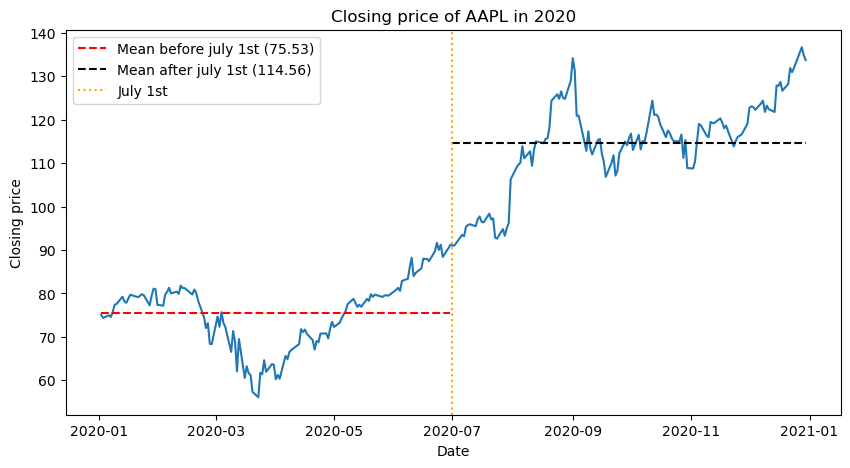

In [77]:
apple['Date'] = pd.to_datetime(apple['Date'])
apple['Date'].sort_values()

cutoff = pd.Timestamp('2020-07-01')
before = apple[apple['Date'] < cutoff]
after = apple[apple['Date'] >= cutoff]

mean_before = before['Close'].mean()
mean_after = after['Close'].mean()

closing_price = apple['Close']

fig, ax = plt.subplots(figsize = (10,5))

ax.plot(
    apple['Date'],
    apple['Close']
)

ax.set_xlabel('Date')
ax.set_ylabel('Closing price')
ax.set_title('Closing price of AAPL in 2020')

ax.hlines(y = mean_before, xmin = before['Date'].min(), xmax = before['Date'].max(), label = f'Mean before july 1st ({mean_before:.2f})', color = 'r', ls = '--')
ax.hlines(y = mean_after, xmin = after['Date'].min(), xmax = after['Date'].max(), label = f'Mean after july 1st ({mean_after:.2f})', color = 'k', ls = '--')

ax.axvline(cutoff, label = 'July 1st', color = 'orange', ls = ':')
ax.grid(False)
ax.legend()

fig.savefig('Files/apple_plot.png', dpi = 300)

plt.show()

### 📚 Exercise 3: Functions in data visualization

The file `closing_prices.csv` contains the daily closing price for 10 different tickers in 2020. The file has a column called `Stock` that indicates which ticker (e.g., 'AAPL', 'WMT', 'GOOG') the observations on the daily closing price (column `Close`) belongs to.

Import the file, and write a function called `plot_ticker(ticker, df)` that: 
- Takes the DataFrame (`df`) and a string (`ticker`) as input.
- Checks whether the given `ticker` is present in the data.
- If the ticker is not found, print:
    - `Ticker <TICKER> not found in dataset`
- If the ticker is found:
    - Plot a line chart of the closing price for that ticker over time.
    - Format the plot by e.g., adding a title, axis labels, legend etc.

Test the function with the following function calls:
```
plot_ticker('AAPL', df)
plot_ticker('WMT', df)
plot_ticker('FAKE', df)
```

In the first two function calls, the output should be a line plot of the daily closing price; whereas the last function call should display the print statement instead.

In [78]:
df_close = pd.read_csv('data/closing_prices.csv')
df_close.head()

,Date,Close,Stock
0,2020-01-02,75.087502,AAPL
1,2020-01-03,74.357498,AAPL
2,2020-01-06,74.949997,AAPL
3,2020-01-07,74.597504,AAPL
4,2020-01-08,75.797501,AAPL


In [79]:
df_close['Date'] = pd.to_datetime(df_close['Date'])

def plot_ticker(ticker, df = df_close):

    if ticker not in df_close['Stock'].unique():
        print(f'Ticker {ticker} not found in dataset')

    else:

        subset = df[df['Stock'] == ticker].sort_values('Date').set_index('Date')

        fig, ax = plt.subplots(figsize = (10, 5))

        ax.plot(
        subset['Close'],
        label = ticker)

        ax.set_title('Daily closing price, 2020')
        ax.set_ylabel('Price ($)')
        ax.set_xlabel('Date')
        ax.legend()

        plt.show()

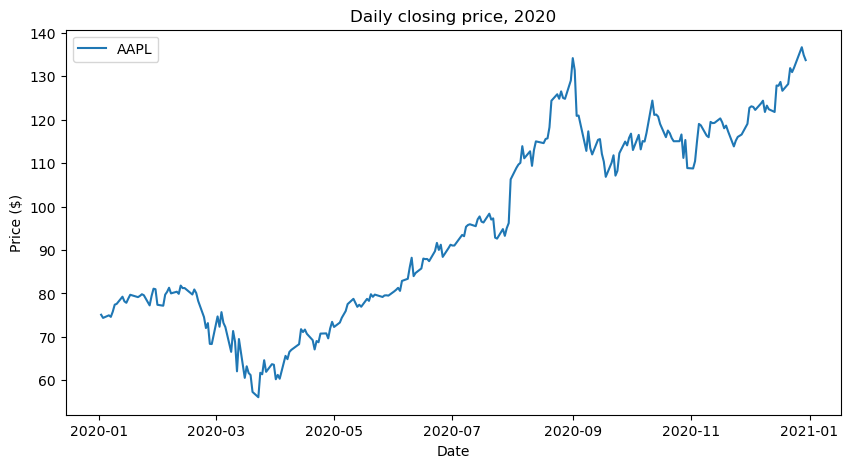

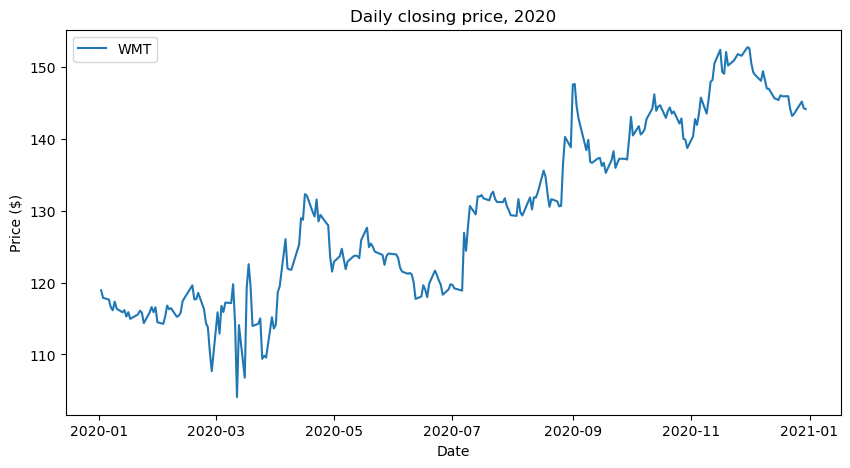

Ticker FAKE not found in dataset


In [80]:
plot_ticker('AAPL')
plot_ticker('WMT')
plot_ticker('FAKE')

### 📚 Exercise 4: For loops in data visualization

Use the data in `closing_prices.csv` to create a series of line charts of the daily closing price for different tickers. Note that the goal of this exercise is to use `for` loops to avoid code duplication.

Import the file, and generate the following plots:

**a)** A single graph that shows the daily closing prices of all of the stocks in the dataset except Google (GOOG) and Amazon (AMZN). Remember to add a legend to identify the different stocks.

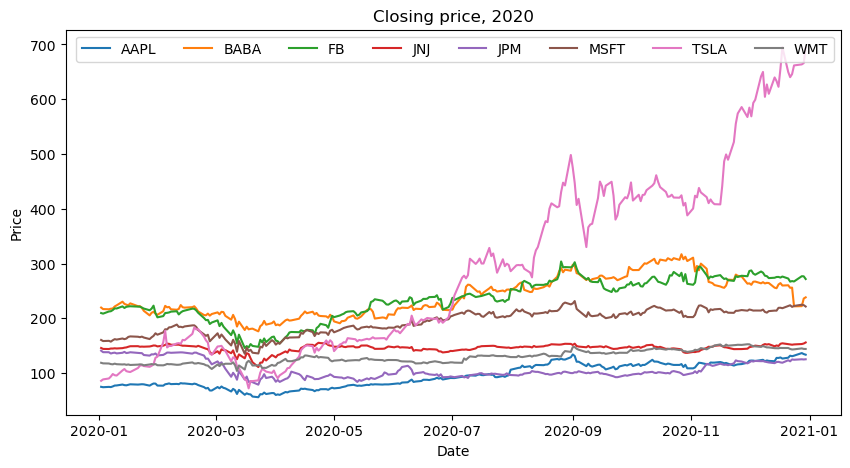

In [90]:
fig, ax = plt.subplots(figsize = (10, 5))

for ticker in df_close['Stock'].unique():
    if ticker not in ('AMZN', 'GOOG'):
        subset = df_close[df_close['Stock'] == ticker].sort_values('Date').set_index('Date')
        ax.plot(
        subset['Close'],
        label = ticker)

        ax.set_xlabel('Date')
        ax.set_ylabel('Price')
        ax.set_title('Closing price, 2020')
        ax.legend(ncols = 8)

plt.show()

**b)** A figure with four subplots side-by-side (i.e., 1 x 4 subplot) with each subplot showing the closing price for one of the following four tickers: 'AAPL', 'BABA', 'TSLA' and 'FB'

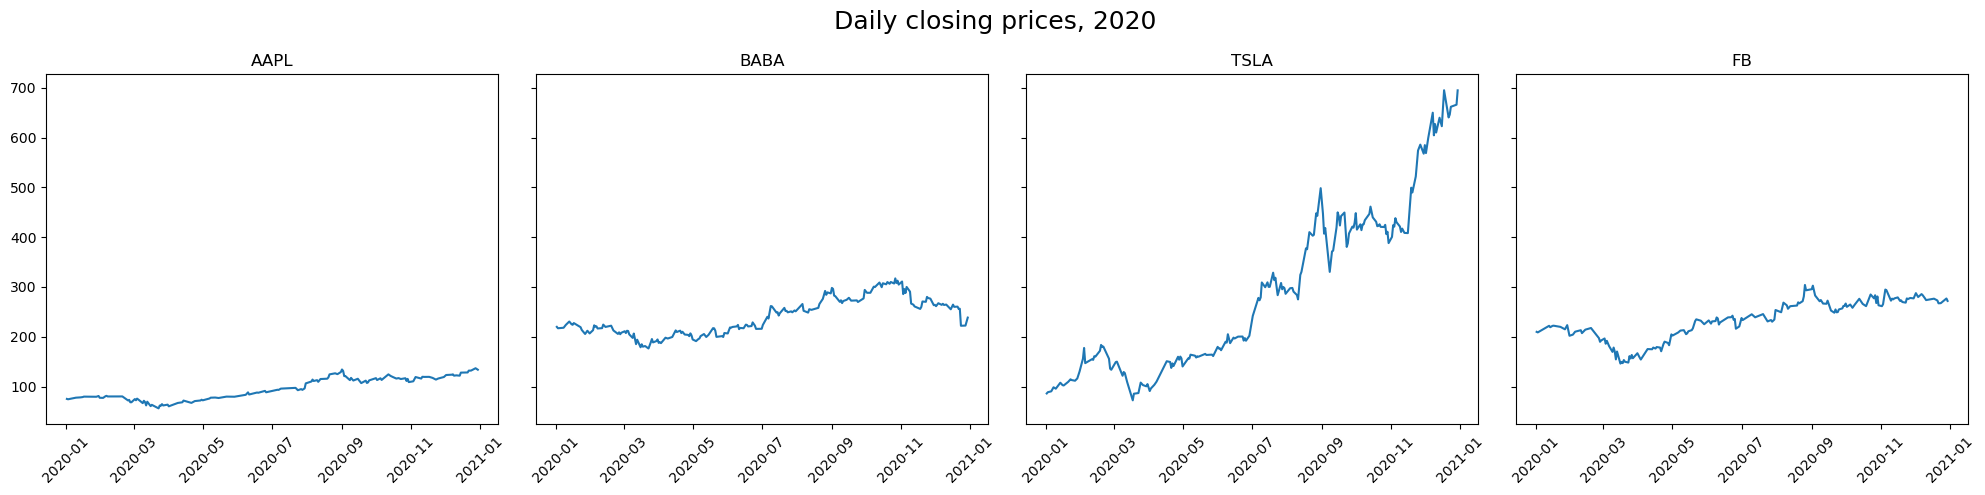

In [125]:
tickers = ('AAPL', 'BABA', 'TSLA', 'FB')

with plt.style.context('fast'):

    fig, ax = plt.subplots(
        figsize = (20, 5),
        nrows = 1, ncols = 4,
        sharey = True)

    for i in range (4):

        subset = df_close[df_close['Stock'] == tickers[i]].sort_values('Date').set_index('Date')

        ax[i].plot(
        subset['Close'])
        ax[i].set_title(tickers[i])

        ax[i].tick_params(axis = 'x', labelrotation = 45)

    fig.suptitle('Daily closing prices, 2020', fontsize = 18)
    plt.tight_layout()

    plt.show()

In [99]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

**c)** A figure with the same four tickers as above, but now the figure is a 2 x 2 subplot, i.e. two rows and two columns. 

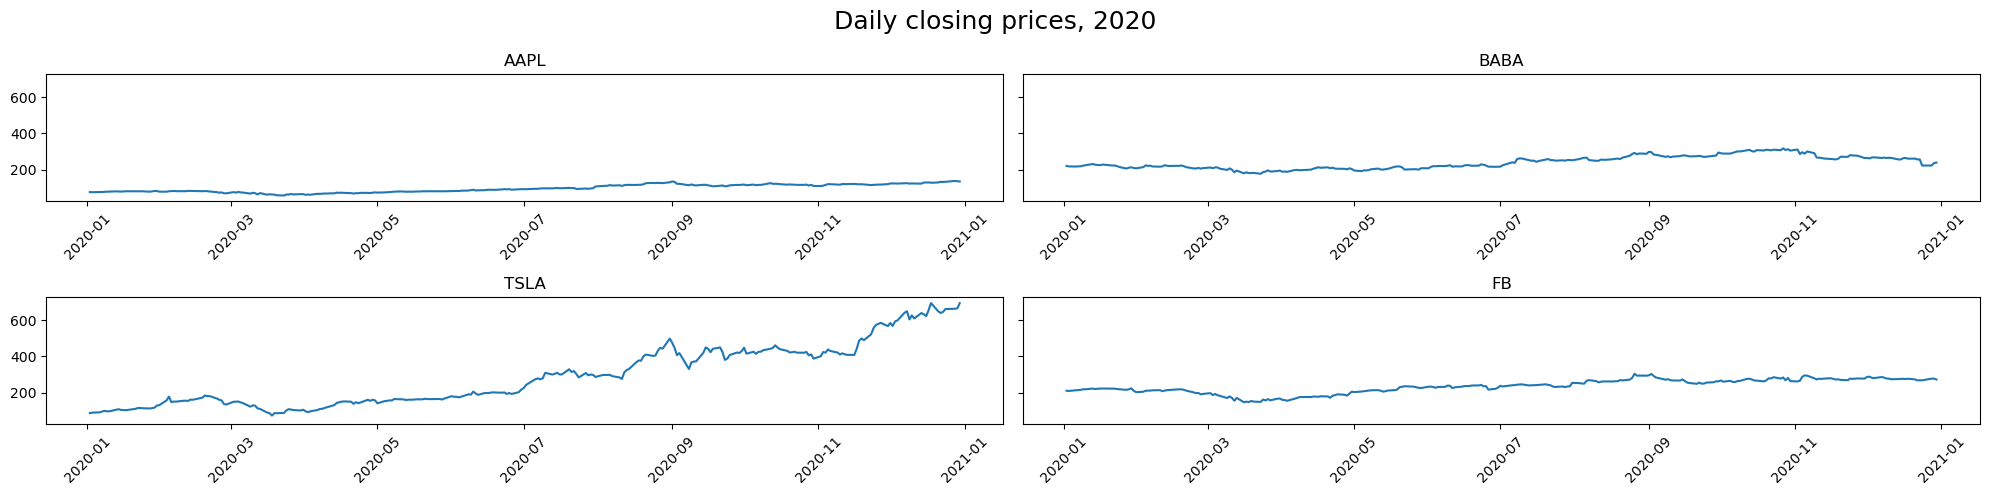

In [135]:
tickers = ('AAPL', 'BABA', 'TSLA', 'FB')

with plt.style.context('fast'):

    fig, ax = plt.subplots(
        figsize = (20, 5),
        nrows = 2, ncols = 2,
        sharey = True)

fax = ax.ravel()

for i in range (4):

    subset = df_close[df_close['Stock'] == tickers[i]].sort_values('Date').set_index('Date')

    fax[i].plot(
    subset['Close'])
    fax[i].set_title(tickers[i])

    fax[i].tick_params(axis = 'x', labelrotation = 45)

fig.suptitle('Daily closing prices, 2020', fontsize = 18)
plt.tight_layout()

plt.show()